In [1]:
import numpy as np
import matplotlib.pyplot as plt

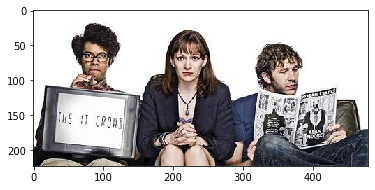

In [53]:
image = plt.imread('images1.jpeg')
plt.imshow(image)
plt.show()

In [10]:
def get_distance(v, w=[1/3,1/3,1/3]):
    a,b,c = v[0], v[1], v[2]
    w1,w2,w3 = w[0], w[1], w[2]
    d=((a**2)*w1+(b**2)*w2+(c**2)*w3)**0.5
    return d

In [20]:
def convert_rgb_to_gray_level_with_distance(image):
    m,n,p = image.shape
    output = np.zeros((m,n), dtype=int)
    for i in range(m):
        for j in range(n):
            output[i,j] = get_distance(image[i,j,:])
    return output

In [21]:
def convert_gray_level_to_BW(image):
    m,n = image.shape
    output = np.zeros((m,n), dtype=float)
    for i in range(m):
        for j in range(n):
            if(image[i,j]>120):
                output[i,j] = 1
            else:
                output[i,j] = 0
    return output

In [63]:
def flat_list(list): #gelen veriyi reshape(1,9) yapıyor
    flat = []
    for i in range(len(list)):
        for j in range(len(list)):
            flat.append(list[i][j])
    return flat

In [59]:
def apply_mask_erosion(list, mask=[1,1,1,1,1,1,1,1,1]):
    list1 = flat_list(list)
    result = 0
    if list1 == mask: #tüm veriler 1 ise 1 olur aksi her durum 0'dır
        result = 1
    return result

In [48]:
def apply_mask_dilation(list, mask=[0,0,0,0,0,0,0,0,0]):
    list1 = flat_list(list)
    result = 1
    if list1 == mask: #tüm veriler 0 ise 0 olur aksi her durum 1'dir
        result = 0
    return result

In [49]:
def erosion(image):
    m,n = image.shape
    output = np.zeros((m,n), dtype=float)
    for i in range(1,m-2):
        for j in range(1,n-2):
            s = image[i-1:i+2, j-1:j+2]
            output[i,j] = apply_mask_erosion(s)
    return output

In [50]:
def dilation(image):
    m,n = image.shape
    output = np.zeros((m,n), dtype=float)
    for i in range(1,m-2):
        for j in range(1,n-2):
            s = image[i-1:i+2, j-1:j+2]
            output[i,j] = apply_mask_dilation(s)
    return output

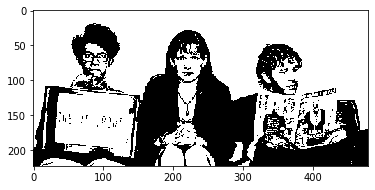

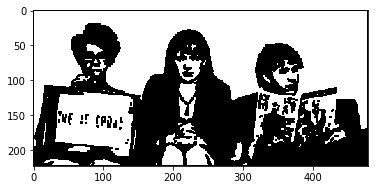

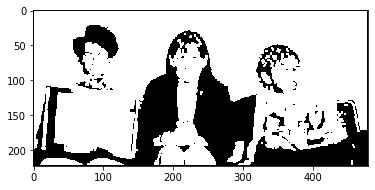

In [64]:
image1 = convert_rgb_to_gray_level_with_distance(image)
image2 = convert_gray_level_to_BW(image1)
plt.imshow(image2, cmap='gray')
plt.show()
image3 = erosion(image2)
plt.imshow(image3, cmap='gray')
plt.show()
image4 = dilation(image2)
plt.imshow(image4, cmap='gray')
plt.show()